In [2]:
import pandas as pd
import numpy as ny
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("car_features.csv")

In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
df.shape

(11914, 16)

In [7]:
df.groupby('Make')['Make'].agg('count')

Make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Bugatti             3
Buick             196
Cadillac          397
Chevrolet        1123
Chrysler          187
Dodge             626
FIAT               62
Ferrari            69
Ford              881
GMC               515
Genesis             3
HUMMER             17
Honda             449
Hyundai           303
Infiniti          330
Kia               231
Lamborghini        52
Land Rover        143
Lexus             202
Lincoln           164
Lotus              29
Maserati           58
Maybach            16
Mazda             423
McLaren             5
Mercedes-Benz     353
Mitsubishi        213
Nissan            558
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Tesla              18
Toyot

In [8]:
df1 = df.drop(['Engine Fuel Type','Number of Doors','Market Category','Vehicle Size','Vehicle Style','Popularity'],axis='columns')
df1.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [9]:
df2 = df1.rename(columns={"Engine HP":"HP",'Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive mode','highway MPG':'MGP-H','city mpg':'MGP-C','MSRP':'Price'})
df2.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df2.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive mode       0
MGP-H            0
MGP-C            0
Price            0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive mode      0
MGP-H           0
MGP-C           0
Price           0
dtype: int64

In [12]:
df3[df3.duplicated()].count()

Make            989
Model           989
Year            989
HP              989
Cylinders       989
Transmission    989
Drive mode      989
MGP-H           989
MGP-C           989
Price           989
dtype: int64

In [13]:
df3.shape

(11816, 10)

In [36]:
df4 = df3.drop_duplicates()
df4.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive mode      10827
MGP-H           10827
MGP-C           10827
Price           10827
dtype: int64

In [37]:
len(df4['Make'].unique())

47

In [38]:
trans = df4['Transmission']=='UNKNOWN'
trans

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: Transmission, Length: 10827, dtype: bool

In [39]:
df4['Price'].describe().round(2)

count      10827.00
mean       42493.25
std        62294.51
min         2000.00
25%        21972.50
50%        30845.00
75%        43300.00
max      2065902.00
Name: Price, dtype: float64

In [40]:
df4.shape

(10827, 10)

<AxesSubplot:xlabel='Price'>

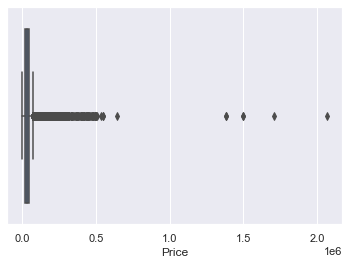

In [41]:
sns.boxplot(x=df4['Price'])

<AxesSubplot:xlabel='HP'>

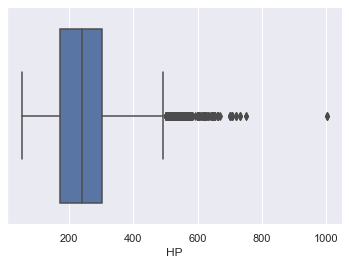

In [42]:
sns.boxplot(x=df4['HP'])

<AxesSubplot:xlabel='Cylinders'>

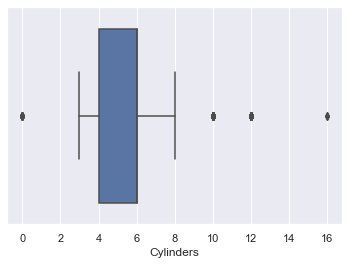

In [43]:
sns.boxplot(x=df4['Cylinders'])

In [44]:
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3-Q1
IQR

Year             9.0
HP             130.0
Cylinders        2.0
MGP-H            8.0
MGP-C            6.0
Price        21327.5
dtype: float64

In [45]:
df4.shape

(10827, 10)

In [46]:
df5 = df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_18975/1138195576.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df5 = df4[~((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

In [47]:
df6 = df5.drop(df5[df5['Transmission']=='UNKNOWN'].index,axis='index')

In [48]:
df6.shape

(9183, 10)

Text(0, 0.5, 'Number of cars')

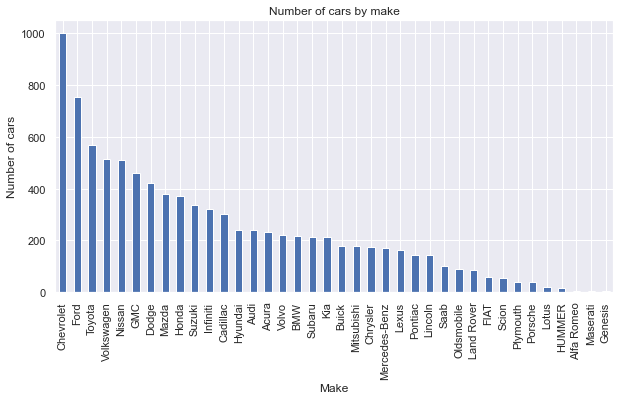

In [49]:
df6.Make.value_counts().nlargest(38).plot(kind='bar',figsize=(10,5))
plt.title('Number of cars by make')
plt.xlabel('Make')
plt.ylabel('Number of cars')

<AxesSubplot:>

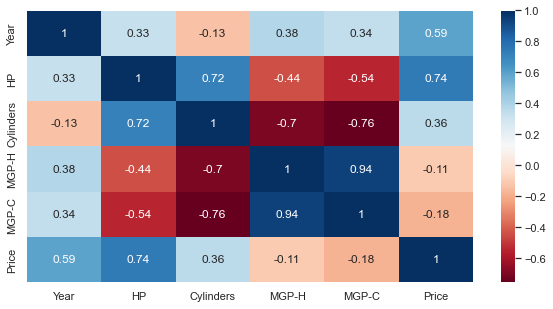

In [50]:
plt.figure(figsize=(10,5))
c = df6.corr()
sns.heatmap(c,cmap='RdBu',annot=True)

Text(0, 0.5, 'Price')

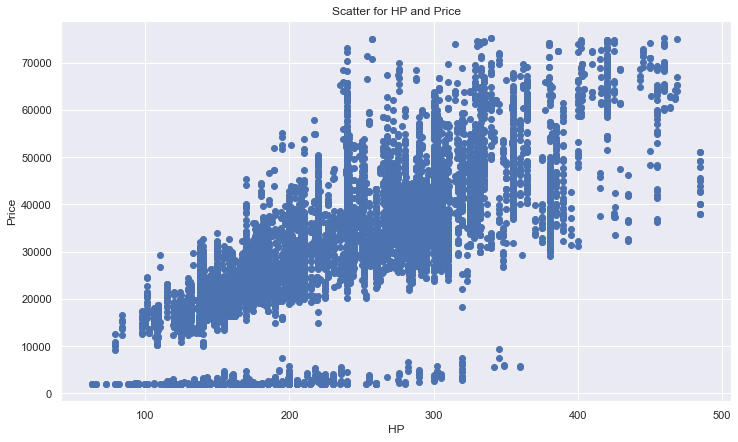

In [51]:
plt.figure(figsize=(12,7))
plt.scatter(df6['HP'],df6['Price'])
plt.title('Scatter for HP and Price')
plt.xlabel('HP')
plt.ylabel('Price')

In [84]:
df6.Cylinders.value_counts()

6.0    3928
4.0    3813
8.0    1297
5.0     142
3.0       3
Name: Cylinders, dtype: int64

Text(0, 0.5, 'Count')

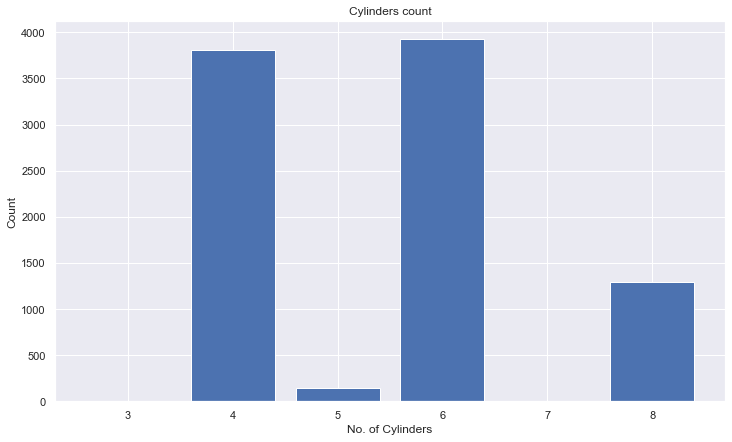

In [89]:
x = pd.Series(df6.Cylinders.value_counts())
y = df6['Cylinders'].unique()
plt.figure(figsize=(12,7))
plt.bar(y,x)
plt.title('Cylinders count')
plt.xlabel('No. of Cylinders')
plt.ylabel('Count')

(array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

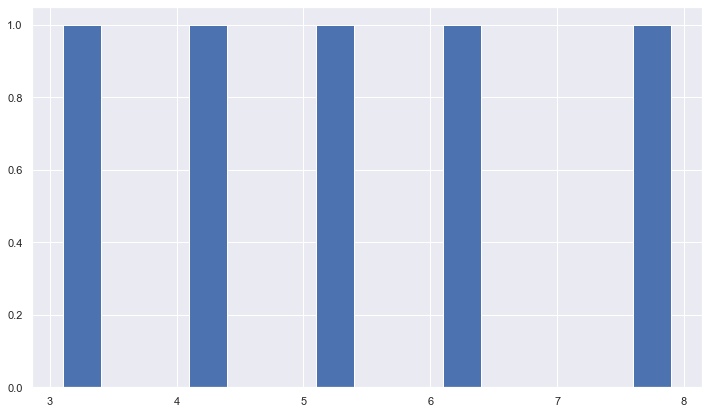

In [62]:
plt.figure(figsize=(12,7))
plt.hist(df6['Cylinders'].unique(),rwidth=0.6)

Text(0, 0.5, 'Count')

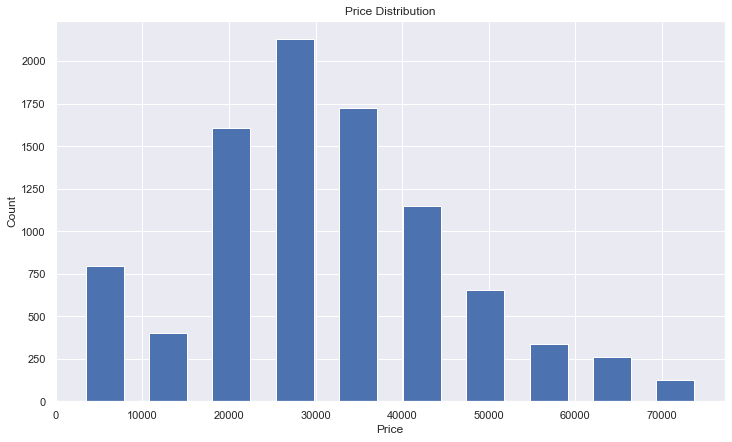

In [52]:
plt.figure(figsize=(12,7))
plt.hist(df6['Price'],rwidth=0.6)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

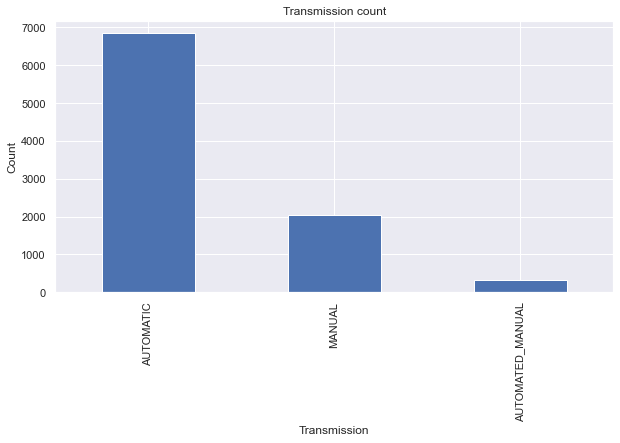

In [31]:
y = df.Transmission.value_counts().nlargest(4).plot(kind='bar',figsize=(10,5))
plt.title('Transmission count')
plt.xlabel('Transmission')
plt.ylabel('Count')

In [55]:
x = df6['Make'].unique()
y = df6.groupby('Make').mean(['HP'])
y.head()

,Year,HP,Cylinders,MGP-H,MGP-C,Price
Make,,,,,,
Acura,2010.823276,245.560345,5.314655,28.418103,20.021552,34663.448276
Alfa Romeo,2015.400000,237.000000,4.000000,34.000000,24.000000,61600.000000
Audi,2014.208333,253.025000,4.966667,29.008333,20.683333,45654.183333
BMW,2014.307339,287.036697,5.449541,29.472477,20.215596,48111.880734
Buick,2011.561111,222.233333,5.222222,27.133333,18.927778,30536.088889


In [54]:
df6.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MGP-H,MGP-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
